In [105]:
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import chi2
plt.figure(figsize=(8,6))

#%matplotlib inline
rmse_lr=None
rmse_knn=None
def linear_regression(scaled_train, scaled_test, values_train, values_test):
    LR = LinearRegression(fit_intercept=True)
    LR.fit(scaled_train, values_train)
    values_predicted = LR.predict(scaled_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(values_test, values_predicted))  
    print('Mean Squared Error:', metrics.mean_squared_error(values_test, values_predicted))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(values_test, values_predicted)))
    print('R2 score:', r2_score(values_test, values_predicted))
    return values_predicted

def KNN_regressor(scaled_train, scaled_test, values_train, values_test):
    KNN = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='minkowski')
    KNN.fit(scaled_train, values_train)
    values_predicted = KNN.predict(scaled_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(values_test, values_predicted))  
    print('Mean Squared Error:', metrics.mean_squared_error(values_test, values_predicted))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(values_test, values_predicted)))
    print('R2 score:', r2_score(values_test, values_predicted))
    rmse_knn=np.sqrt(metrics.mean_squared_error(values_test, values_predicted))
    return values_predicted
    
def Decision_tree(scaled_train, scaled_test, values_train, values_test):
    DT = DecisionTreeRegressor()
    DT.fit(scaled_train, values_train)
    values_predicted = DT.predict(scaled_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(values_test, values_predicted))  
    print('Mean Squared Error:', metrics.mean_squared_error(values_test, values_predicted))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(values_test, values_predicted)))
    print('R2 score:', r2_score(values_test, values_predicted))
    return values_predicted
    

def main():
    columns=['normalising_temperature','tempering_temperature', 'sample_id', 'percent_silicon', 'percent_chromium', 'manufacture_year',
    'percent_copper', 'percent_nickel', 'percent_sulphur', 'percent_carbon', 'percent_manganese', 'tensile_strength']
    raw_data = pd.read_csv('c:/Users/GANESH/Desktop/steel.txt', delimiter='\t', na_values="n/a", header=None)
    named_data = pd.DataFrame(raw_data.values, columns= columns)
    tensile_strength = named_data['tensile_strength']
    features = named_data.drop(columns=['sample_id','tensile_strength'])
    features_train, features_test, values_train, values_test = train_test_split(features, tensile_strength, test_size=0.2, random_state=0)
    scaler = preprocessing.MinMaxScaler()
    scaled_train = scaler.fit_transform(features_train)
    scaled_test = scaler.transform(features_test)
    
    selectKBest = SelectKBest(score_func = f_regression, k=5)
    features_selected_train = selectKBest.fit_transform(scaled_train, values_train)
    features_selected_test =selectKBest.transform(scaled_test)
    
    # Make an instance of the Model
    pca = PCA()
    #fitted_info=pca.fit(scaled_train, values_train)
    
    #plt.plot(np.cumsum(pca.explained_variance_ratio_))
    #plt.xlabel('number of components')
    #plt.ylabel('cumulative explained variance');
    
    fitted_info=pca.fit(features_selected_train, values_train)
    print(pca.components_)
    #plt.plot(np.cumsum(pca.explained_variance_ratio_))
    #plt.xlabel('number of components')
    #plt.ylabel('cumulative explained variance');
    
    

    
    pca= PCA(n_components=5)
    pca.fit(features_selected_train)

    #print(pd.DataFrame(pca.components_,columns=features_train.columns))
    
    pca_train=pca.transform(features_selected_train)
    pca_test=pca.transform(features_selected_test)
     
    
    print("Selected Features: %s" % fitted_info.explained_variance_ratio_)
    #print("Feature Ranking: %s" % fitted_info.ranking_)
    
    print('scaled lr:')
    values_predicted_lr = linear_regression(scaled_train, scaled_test, values_train, values_test)
    
    print('pca lr:')
    pca_predicted_lr = linear_regression(pca_train, pca_test, values_train, values_test)
    

    print('selected lr:')
    linear_regression(features_selected_train, features_selected_test, values_train, values_test)
    
    #print(values_predicted_lr)
    
    print('scaled knn:')
    values_predicted_knn = KNN_regressor(scaled_train, scaled_test, values_train, values_test)
    #print(values_predicted_knn)
    
    print('pca knn:')
    pca_predicted_knn = KNN_regressor(pca_train, pca_test, values_train, values_test)
    
    #plt.plot(sorted(rmse_knn), label="KNN")
    #plt.plot(sorted(rmse_lr), label="Linear Regression")
    #plt.ylabel('Predicted values')
    #plt.show()
    from scipy import stats
    print('Paired t-test:')
    score=stats.ttest_rel(pca_predicted_knn,pca_predicted_lr)
    print(score)
    
    
    print('selected knn')
    KNN_regressor(features_selected_train, features_selected_test, values_train, values_test)
    
    print('scaled dt:')
    values_predicted_DT = Decision_tree(scaled_train, scaled_test, values_train, values_test)
    
    print('pca dt:')
    pca_predicted_dt = Decision_tree(pca_train, pca_test, values_train, values_test)
    
    print('selected dt')
    Decision_tree(features_selected_train, features_selected_test, values_train, values_test)
    
    #print(values_predicted_knn)
    
    #LR.fit(features_train)
    #df = pd.DataFrame({'Actual': value_test.flatten(), 'Predicted': values_predicted.flatten()})
    
    
main()

[[ 0.03745711 -0.99315038  0.06867275 -0.08587894 -0.01257596]
 [ 0.43129731  0.0028322  -0.61745429 -0.41332249  0.51175123]
 [ 0.70354517 -0.02535705 -0.22111433  0.49108319 -0.4629546 ]
 [-0.55624328 -0.10426606 -0.71705346  0.40039138 -0.07240908]
 [ 0.09053839 -0.04615102  0.22578095  0.64831579  0.71998783]]
Selected Features: [0.50802098 0.18860132 0.17762097 0.09273477 0.03302196]
scaled lr:
Mean Absolute Error: 31.810669204932044
Mean Squared Error: 1574.0719634350457
Root Mean Squared Error: 39.67457578141253
R2 score: 0.8287353239385801
pca lr:
Mean Absolute Error: 36.138575227437755
Mean Squared Error: 2191.337006147214
Root Mean Squared Error: 46.81171868397073
R2 score: 0.7615746730662792
selected lr:
Mean Absolute Error: 36.138575227437734
Mean Squared Error: 2191.337006147214
Root Mean Squared Error: 46.81171868397073
R2 score: 0.7615746730662792
scaled knn:
Mean Absolute Error: 31.25233395499099
Mean Squared Error: 1809.3925776828637
Root Mean Squared Error: 42.5369554

<Figure size 576x432 with 0 Axes>

[0.48837849 0.44625895 0.41354131 0.34832242 0.38797495 0.32542043
 0.43013604 0.30531402 0.39694294 0.54957137]
[0.5961707  0.69852502 0.41091475 0.57435638 0.2820633  0.45342928
 0.54542363 0.26147638 0.52355235 0.70282118]


<module 'matplotlib.pyplot' from 'C:\\Users\\GANESH\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

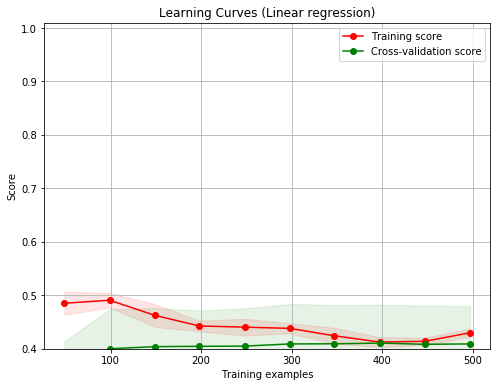

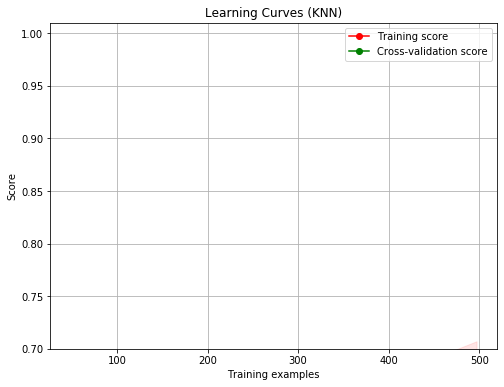

In [107]:
from sklearn.model_selection import KFold
from sklearn.datasets import load_digits
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):

    plt.figure(figsize=(8,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

columns=['normalising_temperature','tempering_temperature', 'sample_id', 'percent_silicon', 'percent_chromium', 'manufacture_year',
'percent_copper', 'percent_nickel', 'percent_sulphur', 'percent_carbon', 'percent_manganese', 'tensile_strength']
raw_data = pd.read_csv('c:/Users/GANESH/Desktop/steel.txt', delimiter='\t', na_values="n/a", header=None)
named_data = pd.DataFrame(raw_data.values, columns= columns)
tensile_strength = named_data['tensile_strength']
features = named_data.drop(columns=['sample_id','tensile_strength'])
features_train, features_test, values_train, values_test = train_test_split(features, tensile_strength, test_size=0.2, random_state=0)
scaler = preprocessing.MinMaxScaler()
scaled_train = scaler.fit_transform(features_train)
scaled_test = scaler.transform(features_test)

pca= PCA(n_components=5)
pca.fit(scaled_train)

selectKBest = SelectKBest(score_func = f_regression, k=5)
features_selected_train = selectKBest.fit_transform(scaled_train, values_train)
features_selected_test =selectKBest.transform(scaled_test)

pca_train=pca.transform(scaled_train)
pca_test=pca.transform(scaled_test)

X=np.concatenate((pca_train, pca_test), 0)
y=np.concatenate((values_train, values_test), 0)

from sklearn.model_selection import cross_val_score

title = "Learning Curves (Linear regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = KFold(n_splits=10, random_state=0)
estimator = LinearRegression()

plot_learning_curve(estimator, title, X, y, ylim=(0.4, 1.01), cv=cv, n_jobs=4)



title = r"Learning Curves (KNN)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = KFold(n_splits=10)
estimator = KNeighborsRegressor(n_neighbors= 5)

print(cross_val_score(estimator, X, y, cv=10))

plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)


In [59]:
a = np.array([[0, 1, 3], [5, 7, 9]])
b = np.array([[0, 2, 4], [6, 8, 10],[0, 2, 4]])
c = np.concatenate((a, b), 0)
print(X.shape)

AttributeError: 'NoneType' object has no attribute 'shape'